In [97]:
import pandas as pd
import numpy as np
import cv2 as cv2#use openCV
from matplotlib import pyplot as plt #use matplot to show image
import time
import os

In [111]:
WHITE_OFFSET = 255.0
BLACK_OFFSET = 0.0
IMAGE_SIZE = (4083,1583)
ROI_H_INITIAL = int(IMAGE_SIZE_H * 0.054)
ROI_W_INITIAL = int(IMAGE_SIZE_W * 0.0343)
GRAY_BLUR_OFFSET = 170
CONTINOUS_REGION = 55
HORIZONTAL_SCAN_RANGE = 175
ROI = (5,5)

class CSAM_Seperation(object):
    def __init__(self, input_file, output_dir,crop_w_size, crop_h_size):
        self.input_file = input_file
        self.output_dir = output_dir
        self.crop_w_size = crop_w_size
        self.crop_h_size = crop_h_size     
    
    def mkdir(self):
        folder = os.path.exists(self.output_dir)
        if not folder:
            os.makedirs(self.output_dir)      
            
    def crop(self):
        self.edited_image()
        img_result = cv2.imread('result.png')
        img_result_recover = img_result
        height, width, channels = img_result_recover.shape
        for ih in range(self.crop_h_size ):
            for iw in range(self.crop_w_size ):
                x = width//self.crop_w_size * iw 
                y = height//self.crop_h_size * ih
                h = (height // self.crop_h_size)
                w = (width // self.crop_w_size )
                img_result = img_result[y:y+h, x:x+w]
                Name = str(time.time())
                path = str(self.output_dir)
                cv2.imwrite(path + Name +  ".png",img_result)
                img_result = img_result_recover
        
    def edited_image(self):
        image = cv2.imread(self.input_file)
        img_resized = cv2.resize(image,IMAGE_SIZE,interpolation = cv2.INTER_AREA)
        img_gray=cv2.cvtColor(img_resized.astype(np.uint8), cv2.COLOR_BGR2GRAY)
        img_roi=img_gray[ROI_H_INITIAL:IMAGE_SIZE[1],ROI_W_INITIAL:IMAGE_SIZE[0]]
        img_mask=np.zeros((img_roi.shape))
        img_gray_blur=cv2.GaussianBlur(img_roi,(5,5),0)
        img_mask[np.where(img_gray_blur>GRAY_BLUR_OFFSET)]=WHITE_OFFSET
        dimensions = img_mask.shape
        for i in range (dimensions[0]): 
            count = 0
            for j in range (HORIZONTAL_SCAN_RANGE):
                if img_mask[i][j] == BLACK_OFFSET:
                    count += 1
                    if count == CONTINOUS_REGION:
                        img_result=img_roi[i-25:i+1290,j-80:j+3675]
                        plt.imshow(img_result, cmap ='gray')
                        cv2.imwrite('result.png',img_result)
                        return
                elif img_mask[i][j] == WHITE_OFFSET:
                    count = 0

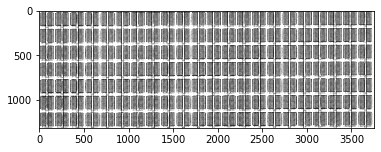

In [112]:
a = CSAM_Seperation("CSAM_ORIGINAL/9.jpg","CROP2/",22,7)
a.mkdir()
a.crop()